# Task 2 : Data Visualization

### **Glossary**

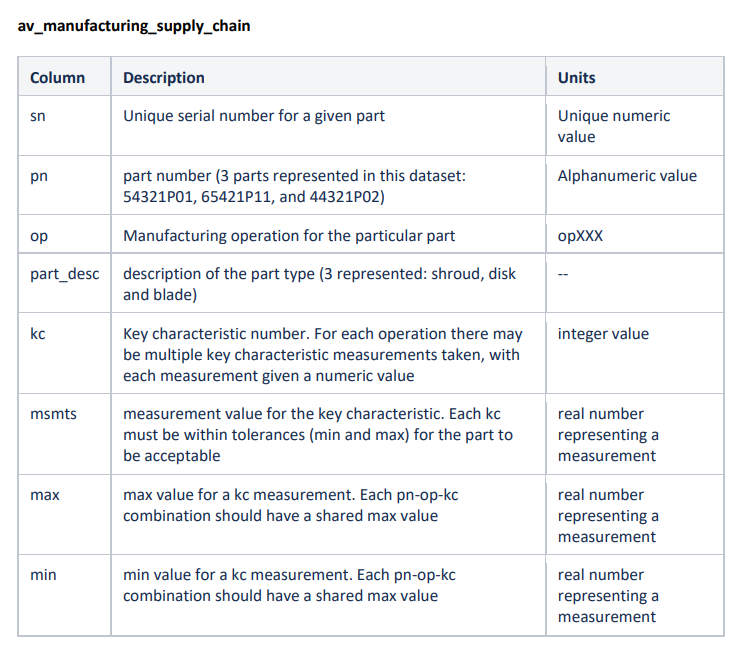

### **Libraries**

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 30 
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 30 seconds


In [54]:
#Load the data
df = pd.read_csv(r"C:\Users\andre\Downloads\ge\av_manufacturing_per_part.csv")

In [56]:
df.head()

,sn,pn,op,part_desc,kc,max,min,msmts,esn,desc,vstream
0,5161682827,54321P01,op116,shroud,1,33.061659,21.160852,31.562316,999001,shroud,cmc
1,5161682827,54321P01,op220,shroud,2,30.303501,17.044897,23.209891,999001,shroud,cmc
2,9279369647,44321P02,op420,blade,1,16.346054,10.600079,10.902121,999001,blade,machined_airfoils
3,2221077760,44321P02,op420,blade,1,16.346054,10.600079,12.314152,999001,blade,machined_airfoils
4,9279369647,44321P02,op016,blade,2,27.987527,11.183152,12.711093,999001,blade,machined_airfoils


### **Exploratory Data Analysis**

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sn         64000 non-null  int64  
 1   pn         64000 non-null  object 
 2   op         64000 non-null  object 
 3   part_desc  64000 non-null  object 
 4   kc         64000 non-null  int64  
 5   max        64000 non-null  float64
 6   min        64000 non-null  float64
 7   msmts      64000 non-null  float64
 8   esn        64000 non-null  int64  
 9   desc       64000 non-null  object 
 10  vstream    64000 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 5.4+ MB


In [39]:
df.describe()

,sn,kc,max,min,msmts,esn
count,6.400000e+04,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000
mean,4.926695e+09,23.625000,118.083144,53.089586,85.720892,999100.500000
std,2.824054e+09,35.580952,116.567149,49.149875,90.146396,57.734756
min,4.117150e+05,1.000000,16.346054,10.600079,3.030937,999001.000000
25%,2.497442e+09,1.000000,29.724507,15.579461,20.203817,999050.750000
50%,4.790020e+09,2.000000,33.061659,21.160852,28.272678,999100.500000
75%,7.366001e+09,40.250000,265.701968,99.827763,165.682144,999150.250000
max,9.999885e+09,120.000000,271.153922,130.588794,362.062278,999200.000000


In [40]:
df.columns

Index(['sn', 'pn', 'op', 'part_desc', 'kc', 'max', 'min', 'msmts', 'esn', 'desc', 'vstream'], dtype='object')

### **Data Visualization**

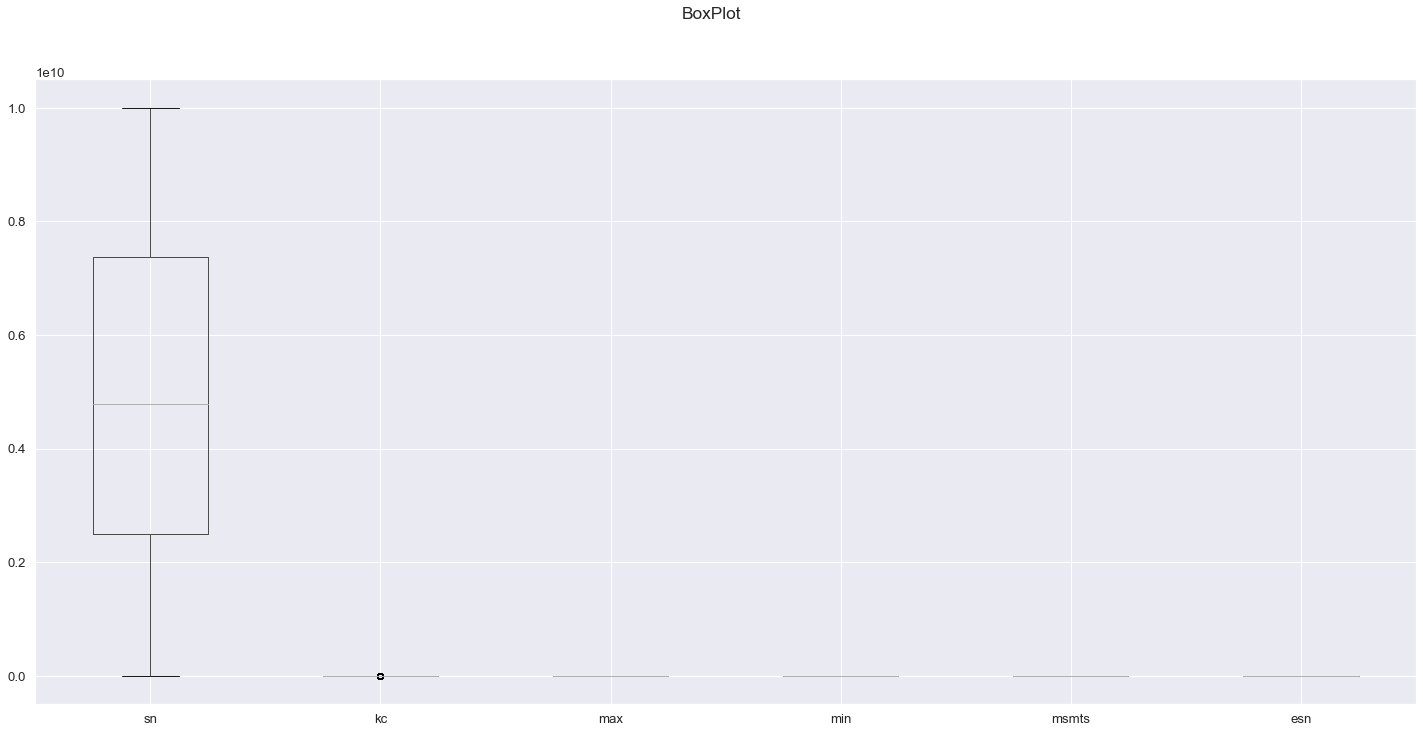

In [41]:
df.boxplot(figsize = (20, 10))
plt.suptitle('BoxPlot', x = 0.5, y = 1.02, ha = 'center', fontsize = 'large')
plt.tight_layout()
plt.show()

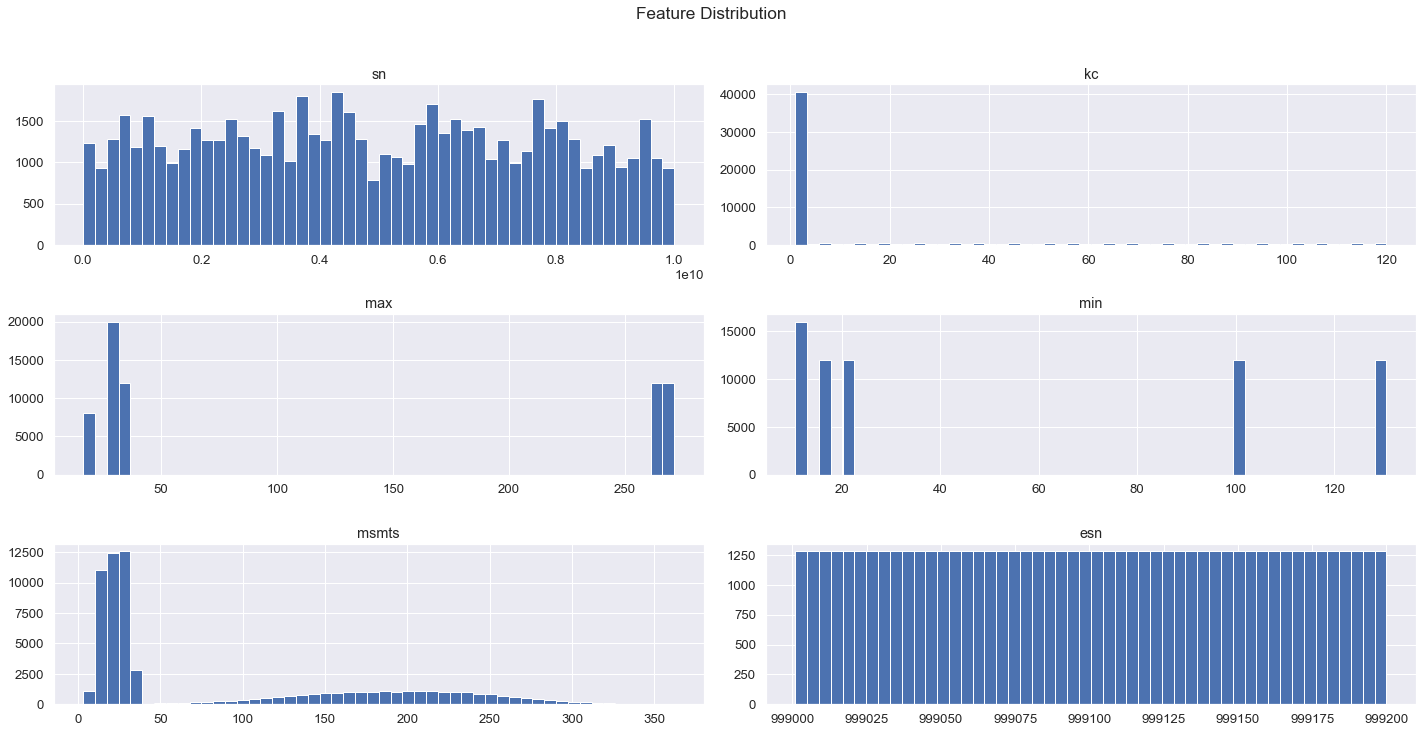

In [42]:
df.hist(bins = 50, figsize = (20, 10))
plt.suptitle('Feature Distribution', x = 0.5, y = 1.02, ha = 'center', fontsize = 'large')
plt.tight_layout()
plt.show()

In [43]:
df1 = df.sample(n = 50, random_state = 0)

In [44]:
df1.head()

,sn,pn,op,part_desc,kc,max,min,msmts,esn,desc,vstream
11277,8168298841,54321P01,op116,shroud,1,33.061659,21.160852,31.624629,999033,shroud,cmc
55819,8255969037,54321P01,op220,shroud,2,30.303501,17.044897,20.413078,999179,shroud,cmc
43223,7415323825,65421P11,op232,disk,21,265.701968,130.588794,193.141955,999174,disk,rotating_parts
1351,8226413398,44321P02,op420,blade,1,16.346054,10.600079,15.740106,999011,blade,machined_airfoils
9247,8193965112,44321P02,op420,blade,1,16.346054,10.600079,13.083395,999031,blade,machined_airfoils


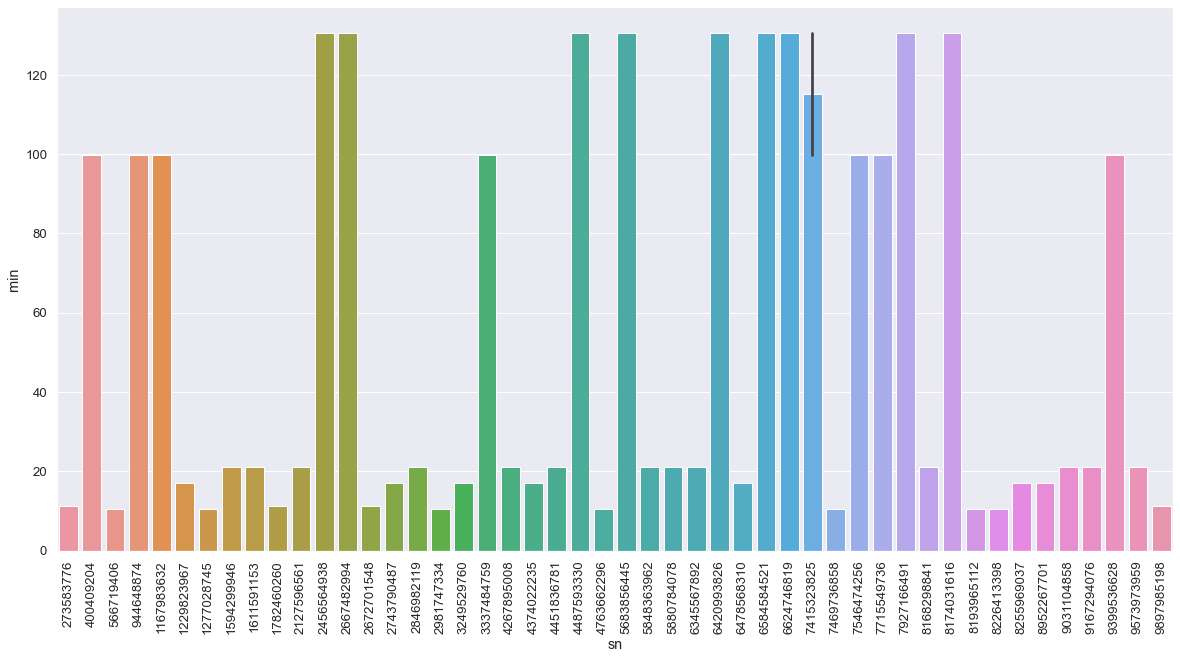

In [45]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'sn', y = 'min', data = df1)
plt.xticks(rotation = 90)
plt.show()

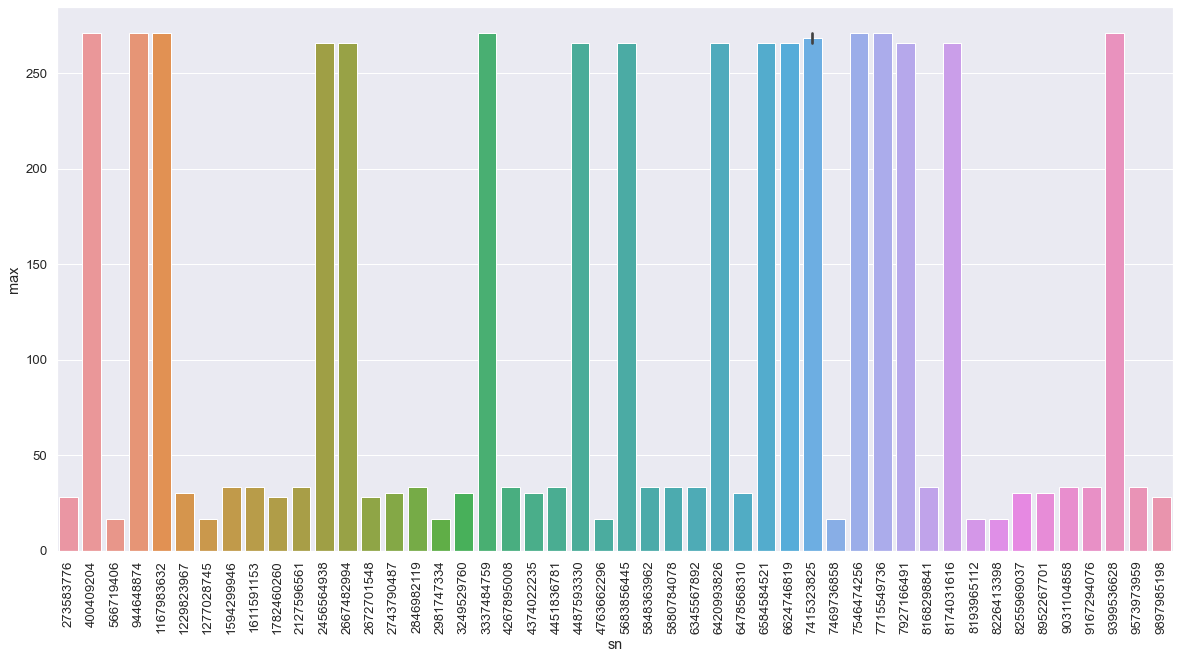

In [46]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'sn', y = 'max', data = df1)
plt.xticks(rotation = 90)
plt.show()

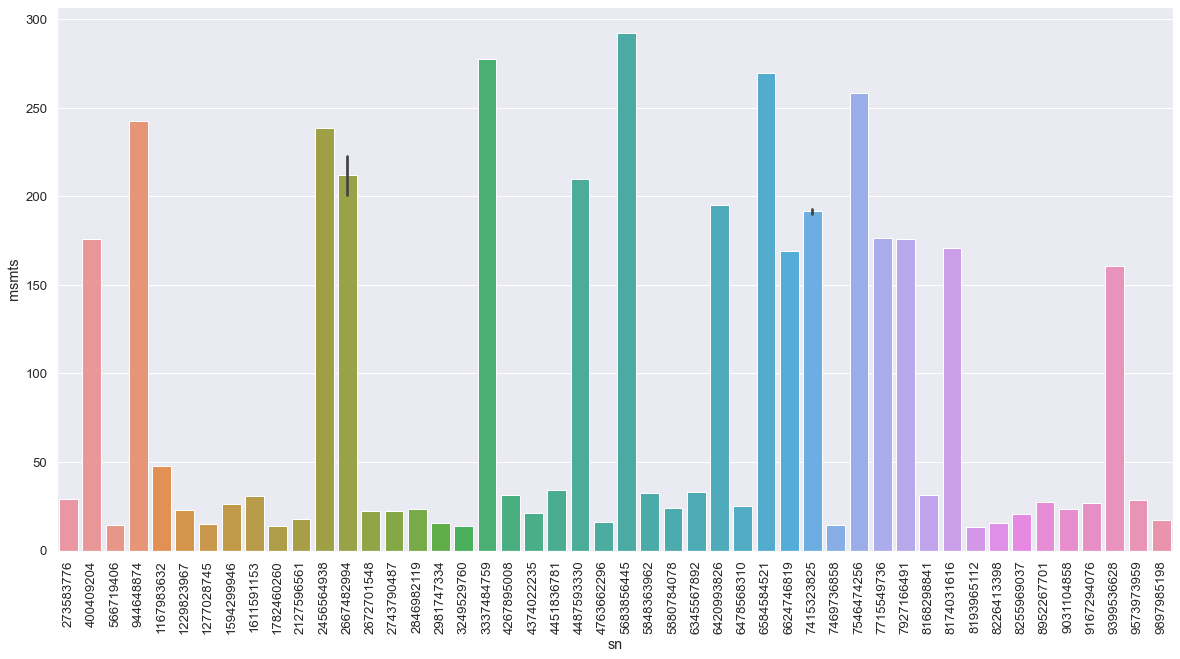

In [47]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'sn', y = 'msmts', data = df1)
plt.xticks(rotation = 90)
plt.show()

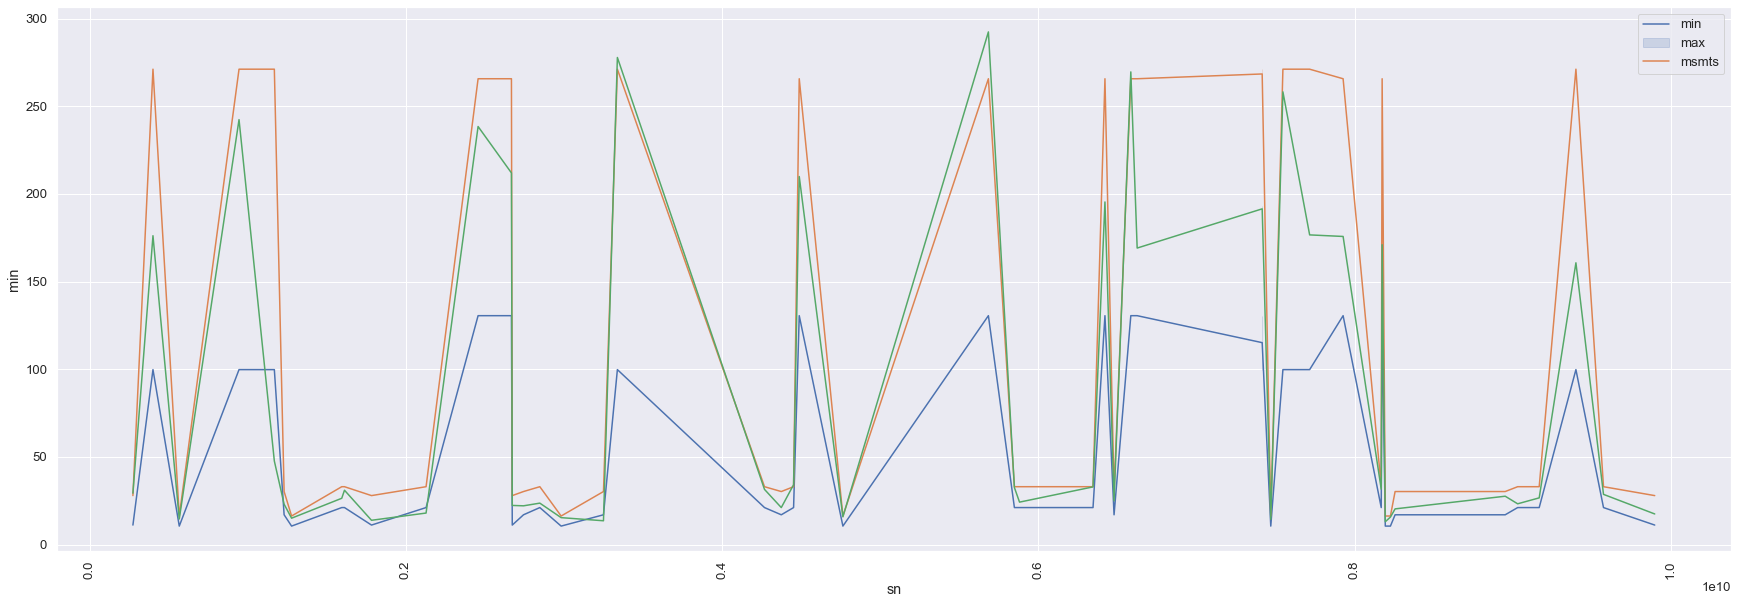

In [48]:
plt.figure(figsize=(30,10))
sns.lineplot(x ='sn', y = 'min', data = df1)
sns.lineplot(x = 'sn', y = 'max', data = df1)
sns.lineplot(x = 'sn', y = 'msmts', data = df1)
plt.legend(labels=['min', 'max', 'msmts'])
plt.xticks(rotation = 90)
plt.show()

<Figure size 1440x1440 with 0 Axes>

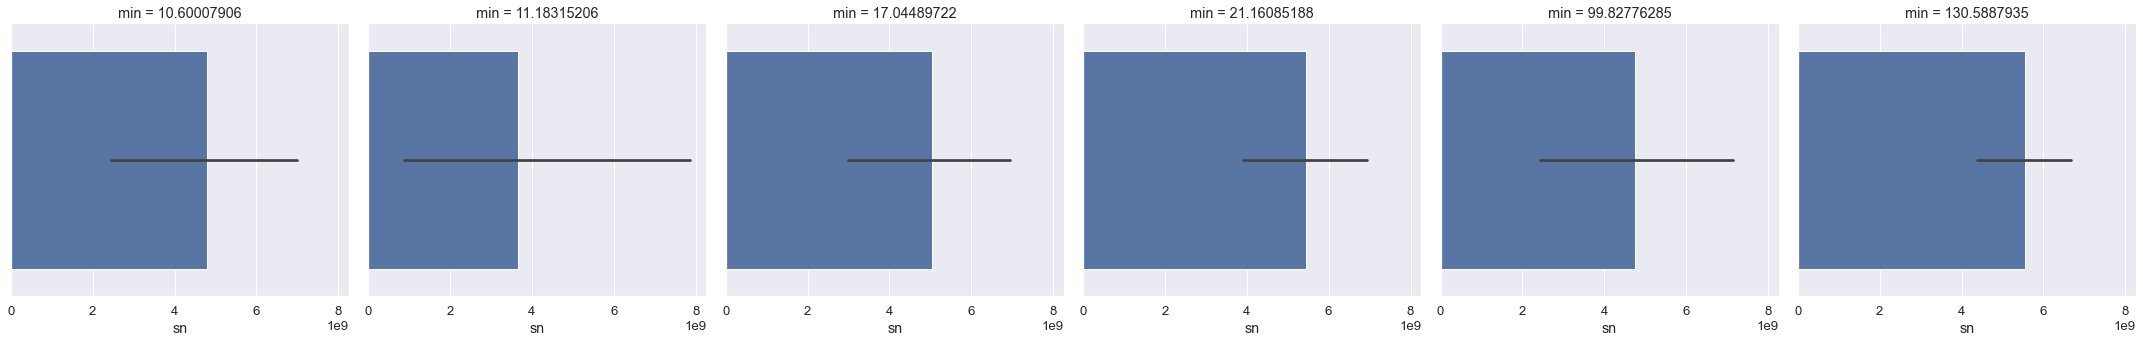

In [49]:
plt.figure(figsize = (20,20))
sns.catplot(data = df1, kind = 'bar', x = 'sn', col = 'min')
plt.show()

<Figure size 1440x1440 with 0 Axes>

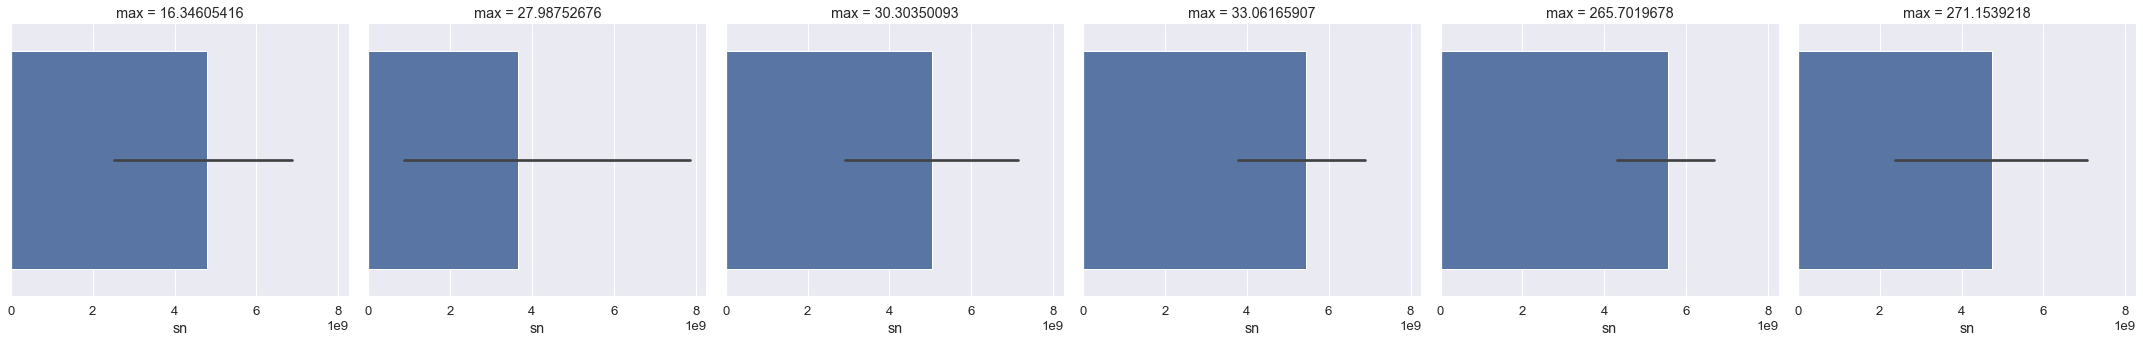

In [50]:
plt.figure(figsize = (20,20))
sns.catplot(data = df1, kind = 'bar', x = 'sn', col = 'max')
plt.show()

<Figure size 1440x1440 with 0 Axes>

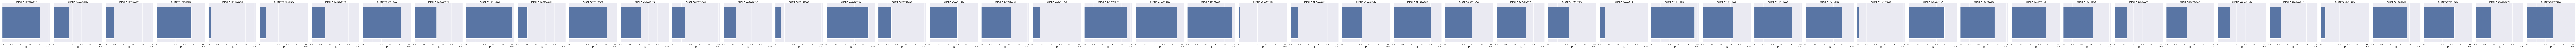

In [61]:
plt.figure(figsize = (20,20))
sns.catplot(data = df1, kind = 'bar', x = 'sn', col = 'msmts')
plt.show()

<Figure size 1440x1440 with 0 Axes>

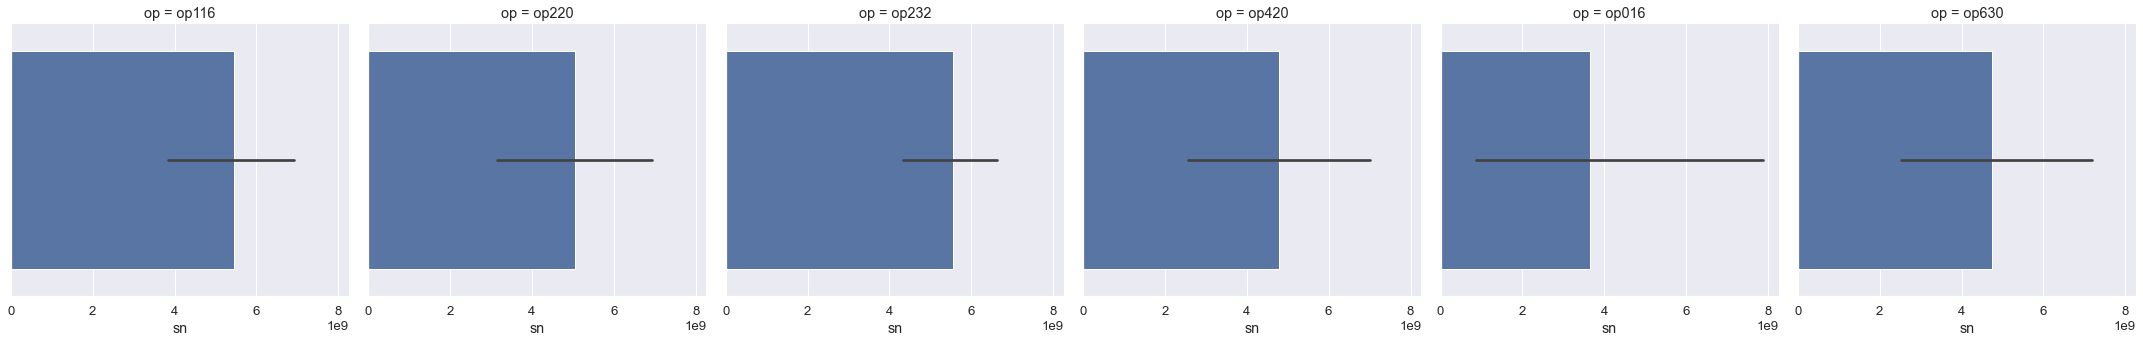

In [52]:
plt.figure(figsize = (20,20))
sns.catplot(data = df1, kind = 'bar', x = 'sn', col = 'op')
plt.show()